In [237]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr
import scipy.stats as stats
from pymc import HalfCauchy, Model, Normal, sample, HalfNormal
import random
import math
import matplotlib.pyplot as plt
print(f"Running on PyMC v{pm.__version__}")



Running on PyMC v5.10.0


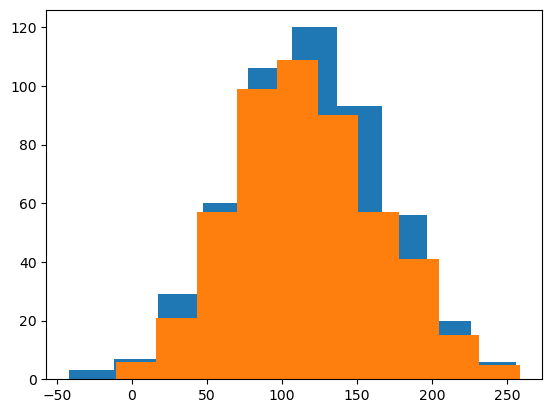

In [238]:
TRUE_MEAN_1 = 120
TRUE_MEAN_2 = 119
TRUE_VARIANCE = 50
SAMPLES = 500
data1 = np.array([random.gauss(TRUE_MEAN_1, TRUE_VARIANCE) for i in range(0, SAMPLES)])
data2 = np.array([random.gauss(TRUE_MEAN_2, TRUE_VARIANCE) for i in range(0, SAMPLES)])

plt.hist(data1)
plt.hist(data2)
plt.show()


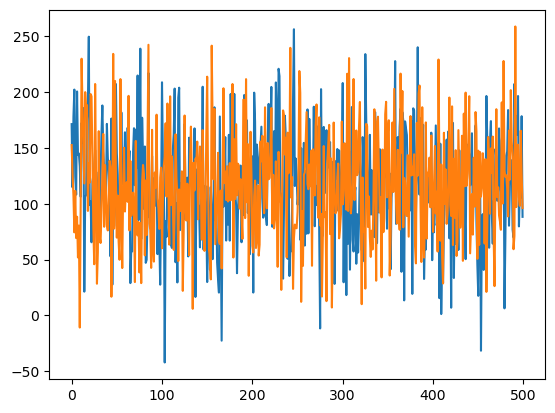

In [239]:
plt.plot(data1)
plt.plot(data2)
plt.show()

In [240]:
with pm.Model() as model:
    p_A = pm.Normal("p_A", mu=120, sigma=50)
    p_B = pm.Normal("p_B", mu=120, sigma=50)
    v_A = pm.HalfNormal("v_A", sigma=50)
    v_B = pm.HalfNormal("v_B", sigma=50)
    obs_A = pm.Normal("obs_A", mu=p_A, sigma=v_A, observed=data1)
    obs_B = pm.Normal("obs_B", mu=p_B, sigma=v_B, observed=data2)
    delta = pm.Deterministic("delta", p_A - p_B)

    trace = pm.sample()
    print(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A, p_B, v_A, v_B]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data


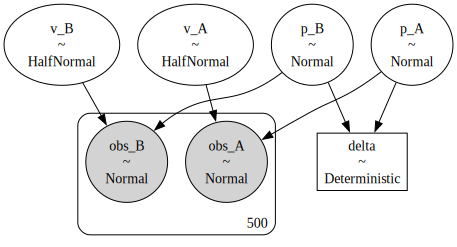

In [241]:
pm.model_to_graphviz(model)

In [242]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_A,117.093,2.158,113.050,121.007,0.026,0.019,6781.0,3242.0,1.0
p_B,116.244,2.154,112.278,120.230,0.028,0.020,5941.0,3128.0,1.0
v_A,49.096,1.538,46.226,51.915,0.019,0.014,6090.0,3209.0,1.0
v_B,48.415,1.555,45.635,51.462,0.020,0.014,6384.0,3379.0,1.0
delta,0.849,3.017,-4.561,6.752,0.039,0.042,5874.0,2976.0,1.0


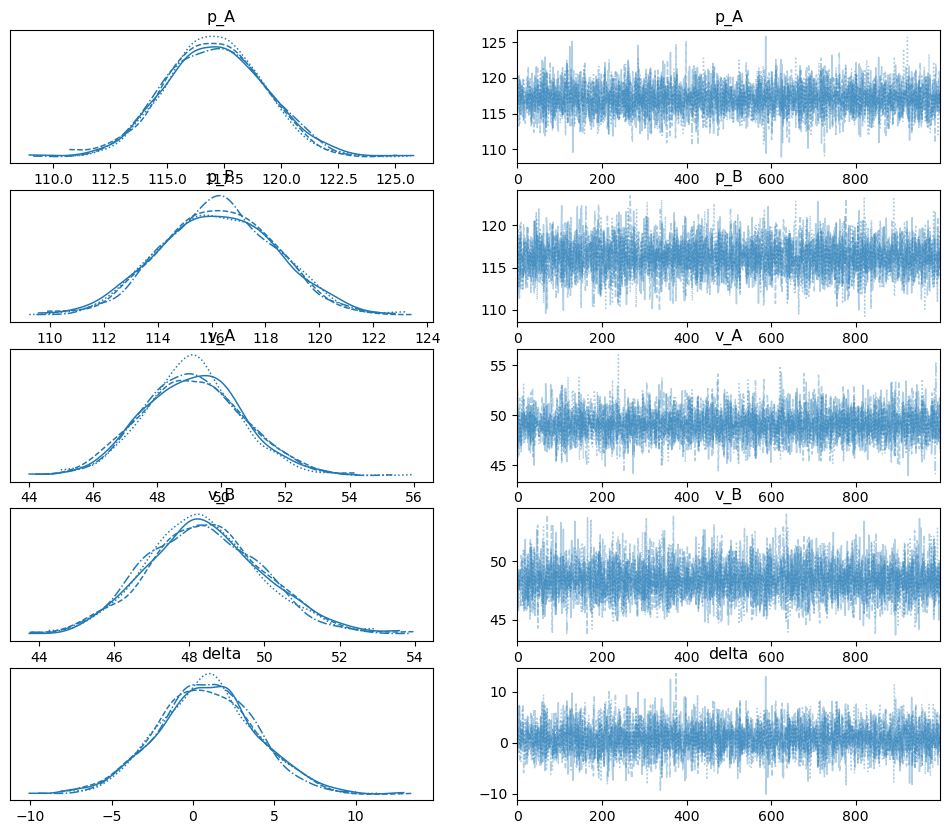

In [243]:
az.plot_trace(trace);


array([[<Axes: title={'center': 'p_A'}>, <Axes: title={'center': 'p_B'}>,
        <Axes: title={'center': 'v_A'}>],
       [<Axes: title={'center': 'v_B'}>,
        <Axes: title={'center': 'delta'}>, <Axes: >]], dtype=object)

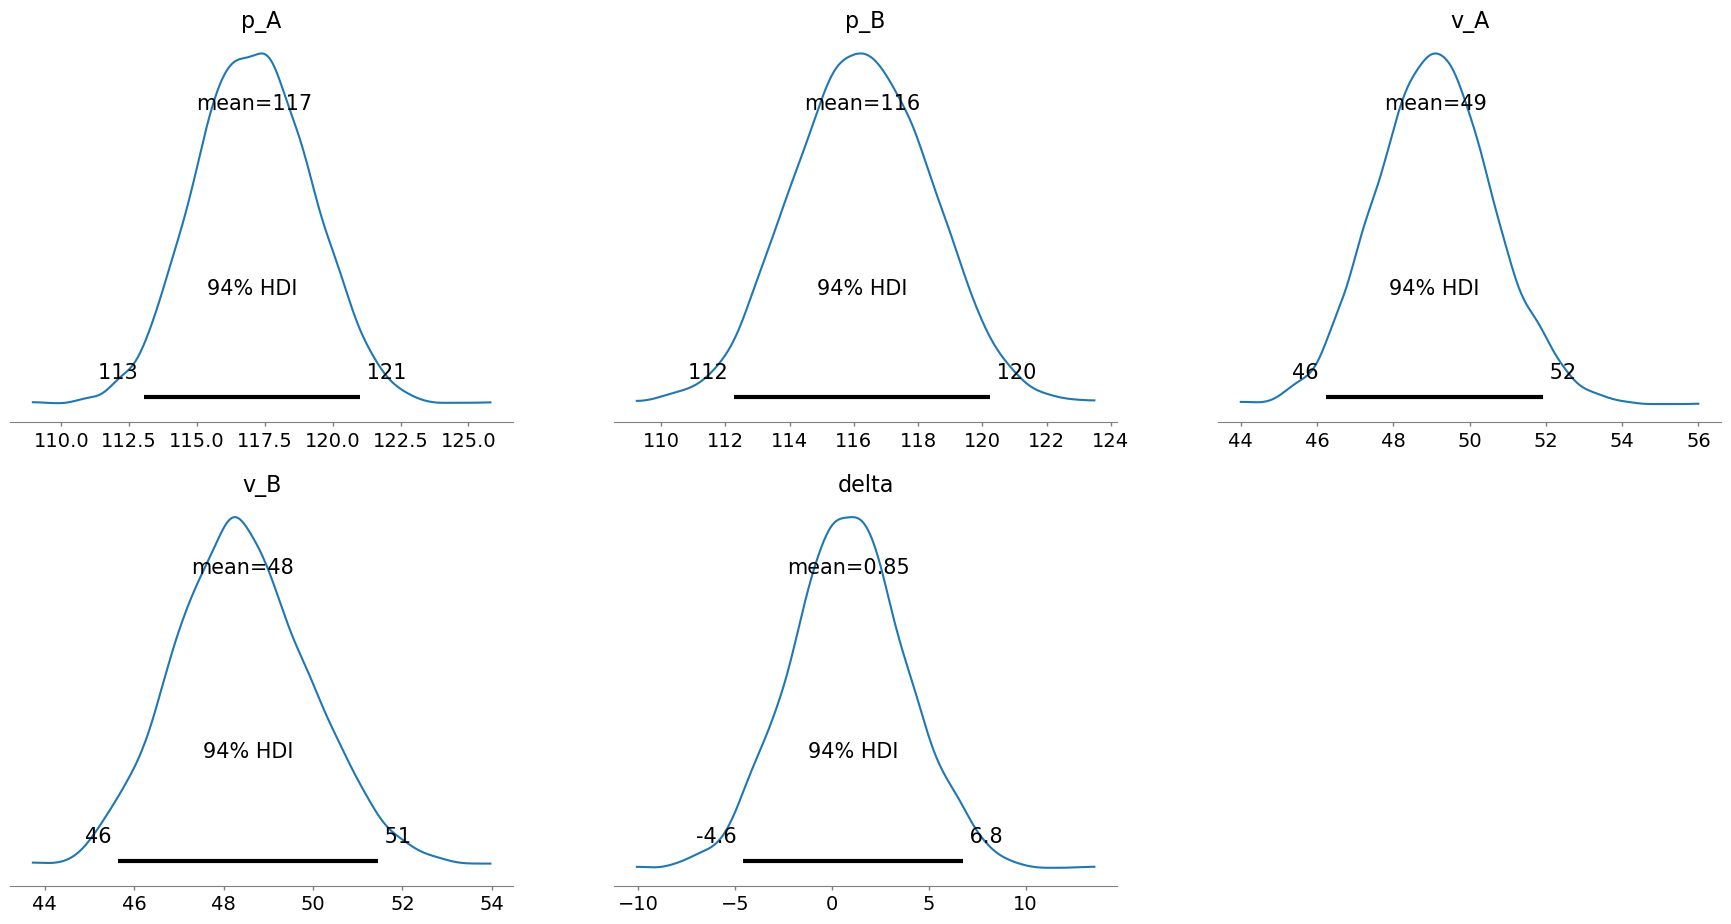

In [244]:
az.plot_posterior(trace)

In [245]:
delta_samples = trace.posterior["delta"]

print("Probability site A is WORSE than site B: %.3f" % \
    np.mean(delta_samples < 0))

print("Probability site A is BETTER than site B: %.3f" % \
    np.mean(delta_samples > 0))

print("Delta STD: %.3f" % \
    np.std(delta_samples))


Probability site A is WORSE than site B: 0.389
Probability site A is BETTER than site B: 0.611
Delta STD: 3.017


Probability that B is better: 38.9%.
AVG A: 117.092684387788.
STD A: 2.157902586121486.
AVG B: 116.24412542255467.
STD B: 2.157902586121486.


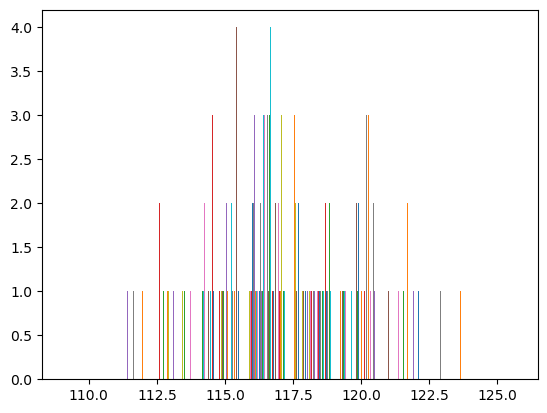

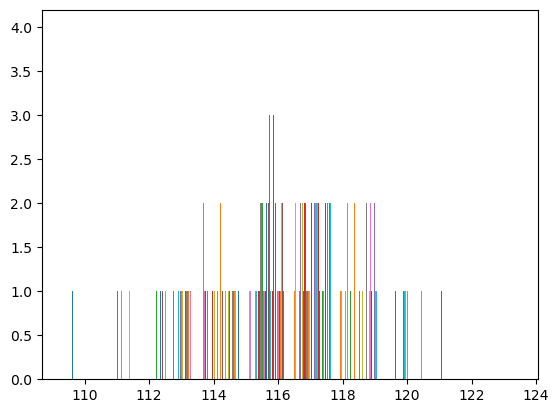

In [246]:
samples_A = trace.posterior['p_A'].values
samples_B = trace.posterior['p_B'].values

print(f'Probability that B is better: {(samples_B > samples_A).mean():.1%}.')
print(f'AVG A: {samples_A.mean()}.')
print(f'STD A: {samples_A.std()}.')
print(f'AVG B: {samples_B.mean()}.')
print(f'STD B: {samples_A.std()}.')

plt.hist(samples_A)
plt.show()

plt.hist(samples_B)
plt.show()